##  Analysis & Predictive Insights


## Turma 90BI

## Trabalho prático usando o Python

## Habilidades desenvolvidas: Detecção de outliers.


- Para media usamos o DP
- Para a Mediana usamos IQR

### Instalar as bibliotecas pandas, numpy, matplotlib e seaborn

In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# opcao de mudar a notacao cientifica para aritmerica
pd.set_option('display.float_format','{:.2f}'.format)

In [29]:
# Importar a base de dados
cadastro = pd.read_csv('cadastro.csv')

In [30]:
# Visualizar os dados
cadastro.head()

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,DATA_NASCIMENTO,RENDA_PRESUMIDA,CEP,LOGRADOURO,NUMERO,COMPLEMENTO,CEP_A,...,NUM_AGENCIA,NUM_CONTA,MARCA_VEICULO,MODELO_VEICULO,PLACA_VEICULO,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,DATA_INCLUSAO1,IDADE
0,1,40977545806,1,25/09/1996,1890000.00,2471020,R AUGUSTO VIANA DE CASTELO,26.00,NaN,2471020,...,NaN,NaN,NaN,NaN,NaN,3774819001508.00,220,1,2/26/2019 11:28:49,23.00
1,2,72544350725,2,10/03/1961,1333890.24,1319001,R MARIA PAULA,201.00,AP 52,1319001,...,6571.00,15044.00,FERRARI,355 SPIDER,AFZ6118,40432544000147.00,850,1,2/7/2001 0:00:00,40.00
2,3,10536099812,3,28/11/1965,22000.00,4323120,R DAS JOIAS,202.00,VL DO,4323120,...,7006.00,52946.00,NaN,NaN,NaN,61695227000193.00,142,1,8/23/2018 6:42:12,53.00
3,4,1471742873,4,02/05/1959,16000.00,4136030,R GUARAREMA,430.00,NaN,4136030,...,1850.00,1103486.00,NaN,NaN,NaN,NaN,0,1,NaN,NaN
4,5,954396332,5,10/11/1984,15929.00,8452105,R JOAO DE SIQUEIRA AFONSO,709.00,CAS,8452105,...,123.00,580882.00,NaN,NaN,NaN,35109651000107.00,400,1,11/24/2010 10:30:45,26.00


In [85]:
cadastro["RENDA_PRESUMIDA"].describe()

count       426.00
mean      10387.81
std      111783.91
min           0.00
25%        2068.50
50%        2431.58
75%        2923.55
max     1890000.00
Name: RENDA_PRESUMIDA, dtype: float64

In [84]:
cadastro.to_excel("teste.xlsx")

## Análise de detecção de outliers usando o Box Plot




<Axes: ylabel='RENDA_PRESUMIDA'>

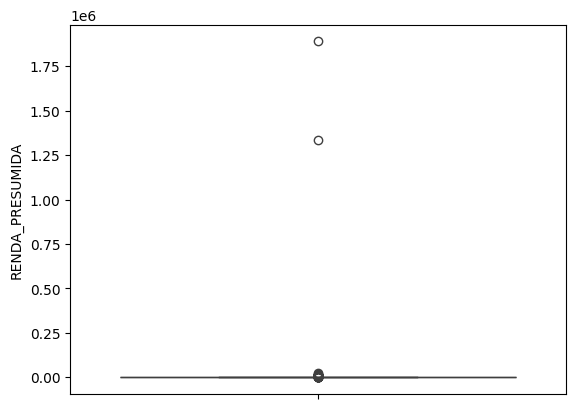

In [52]:
sns.boxplot(y="RENDA_PRESUMIDA", data=cadastro)

Text(0.5, 1.0, 'Histograma da renda presumida')

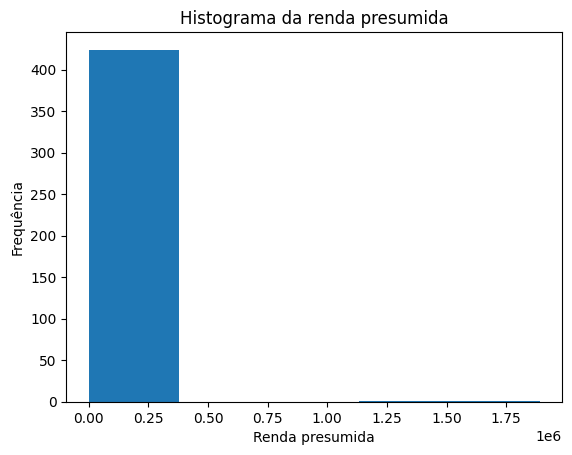

In [53]:
# Histograma da variável Renda presumida
plt.hist(cadastro['RENDA_PRESUMIDA'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Renda presumida')
plt.title('Histograma da renda presumida')

## Cálculo dos limites que definem outliers e pontos extremos do Box Plot

### Variável de análise: RENDA_PRESUMIDA

In [54]:
# Cálculo do mínimo
print('Minimo = ', min(cadastro['RENDA_PRESUMIDA']))

Minimo =  0.0


In [60]:
# Cálculo do máximo
print('Maximo = ', max(cadastro['RENDA_PRESUMIDA']))

Maximo =  1890000.0


In [61]:
# Cálculo do quartil 1
Q1 = np.percentile(cadastro['RENDA_PRESUMIDA'], 25)
print(Q1)
print('Quartil1 (Q1) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 25))

2068.5
Quartil1 (Q1) =  2068.5


In [62]:
# Cálculo do quartil 2
Q2=np.percentile(cadastro['RENDA_PRESUMIDA'], 50)
print(Q2)
print('Quartil2 (Q2) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 50))

2431.58
Quartil2 (Q2) =  2431.58


In [63]:
# Cálculo do quartil 3
Q3=np.percentile(cadastro['RENDA_PRESUMIDA'], 75)
print(Q3)
print('Quartil3 (Q3) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 75))

2923.545
Quartil3 (Q3) =  2923.545


In [64]:
# Cálculo do interquartil (IQ)
IQ = np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25)
print(IQ)
print('Inter-quartil (IQ) =', np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25))

855.0450000000001
Inter-quartil (IQ) = 855.0450000000001


In [72]:
# Limite 1
limite1 = Q3+3*IQ
print(limite1)

5488.68


In [73]:
#Limite 2
limite2 = Q3+1.5*IQ
print(limite2)

4206.1125


In [67]:
#Limite 3
limite3=Q1-1.5*IQ
print(limite3)

785.9324999999999


In [68]:
#Limite 4
limite4 = Q1-3*IQ
print(limite4)

-496.6350000000002


In [77]:
# Criar uma variável outlier_renda no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite2) & (cadastro.RENDA_PRESUMIDA <= limite1), 'outlier_renda']=1
cadastro.loc[(cadastro.RENDA_PRESUMIDA > limite1) | (cadastro.RENDA_PRESUMIDA < limite4) , 'outlier_renda']=2
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite4) & (cadastro.RENDA_PRESUMIDA <= limite3) , 'outlier_renda']=1
cadastro.loc[(cadastro.RENDA_PRESUMIDA > limite3) & (cadastro.RENDA_PRESUMIDA < limite2), 'outlier_renda']=0

In [78]:
cadastro.head()

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,DATA_NASCIMENTO,RENDA_PRESUMIDA,CEP,LOGRADOURO,NUMERO,COMPLEMENTO,CEP_A,...,NUM_CONTA,MARCA_VEICULO,MODELO_VEICULO,PLACA_VEICULO,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,DATA_INCLUSAO1,IDADE,outlier_renda
0,1,40977545806,1,25/09/1996,1890000.00,2471020,R AUGUSTO VIANA DE CASTELO,26.00,NaN,2471020,...,NaN,NaN,NaN,NaN,3774819001508.00,220,1,2/26/2019 11:28:49,23.00,2.00
1,2,72544350725,2,10/03/1961,1333890.24,1319001,R MARIA PAULA,201.00,AP 52,1319001,...,15044.00,FERRARI,355 SPIDER,AFZ6118,40432544000147.00,850,1,2/7/2001 0:00:00,40.00,2.00
2,3,10536099812,3,28/11/1965,22000.00,4323120,R DAS JOIAS,202.00,VL DO,4323120,...,52946.00,NaN,NaN,NaN,61695227000193.00,142,1,8/23/2018 6:42:12,53.00,2.00
3,4,1471742873,4,02/05/1959,16000.00,4136030,R GUARAREMA,430.00,NaN,4136030,...,1103486.00,NaN,NaN,NaN,NaN,0,1,NaN,NaN,2.00
4,5,954396332,5,10/11/1984,15929.00,8452105,R JOAO DE SIQUEIRA AFONSO,709.00,CAS,8452105,...,580882.00,NaN,NaN,NaN,35109651000107.00,400,1,11/24/2010 10:30:45,26.00,2.00


In [79]:
# Tabela de frequência da variável outlier_renda

freq_outlier_renda = pd.pivot_table(cadastro,index='outlier_renda', values='NUM_CPF', aggfunc=np.count_nonzero)
freq_outlier_renda['%'] = ((pd.pivot_table(cadastro,index='outlier_renda', values='NUM_CPF', aggfunc=np.count_nonzero)/cadastro['NUM_CPF'].count())*100).round(2)

In [81]:
freq_outlier_renda

,NUM_CPF,%
outlier_renda,,
0.00,368,86.38
1.00,38,8.92
2.00,20,4.69


In [80]:
################################################
########### REMOVER OS OUTLIERS ############
################################################

# Removendo os Outliers
cadastroSemOutlier = cadastro.loc[cadastro.outlier_renda == 0.0]

print('Mínimo = ', min(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('Máximo = ', max(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('Média = ', (cadastroSemOutlier['RENDA_PRESUMIDA']).mean())

print('STD = ', cadastroSemOutlier['RENDA_PRESUMIDA'].std())

print('Coeficiente de Variação = ', (cadastroSemOutlier['RENDA_PRESUMIDA'].std() / cadastroSemOutlier['RENDA_PRESUMIDA'].mean()))

print('Mediana = ', (cadastroSemOutlier['RENDA_PRESUMIDA']).median())


Mínimo =  1825.32
Máximo =  4200.0
Média =  2489.861630434783
STD =  517.4251707755459
Coeficiente de Variação =  0.20781282158446387
Mediana =  2400.0


Se o coeficiente d evariação estiver até 30% não tem outlier

Text(0.5, 1.0, 'Histograma da renda presumida')

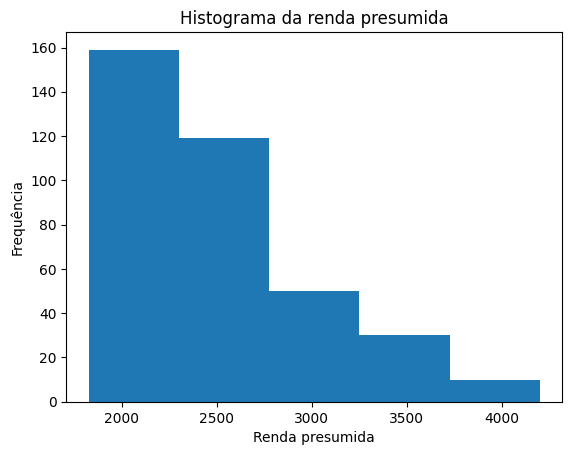

In [82]:
# Histograma da variável Renda presumida
plt.hist(cadastroSemOutlier['RENDA_PRESUMIDA'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Renda presumida')
plt.title('Histograma da renda presumida')

Text(0.5, 0, 'RENDA_PRESUMIDA (R$)')

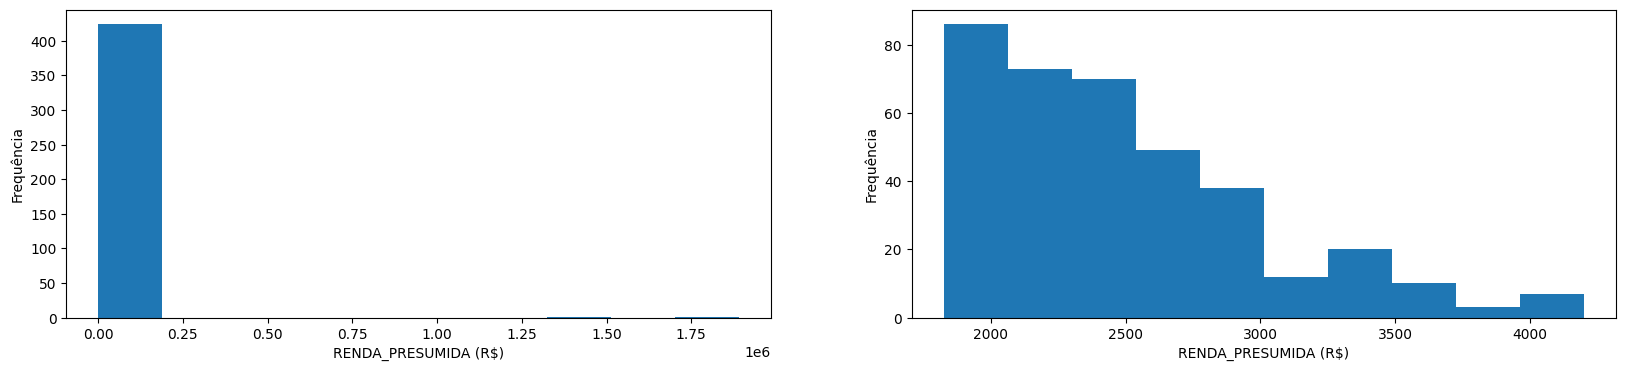

In [83]:
# Gráfico histograma da Ingestão de Sal e Z_score_sal
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,4))

plt.subplot(1,2,1)
plt.hist(cadastro['RENDA_PRESUMIDA'], bins=10)
plt.ylabel('Frequência')
plt.xlabel('RENDA_PRESUMIDA (R$)')
plt.subplot(1,2,2)
plt.hist(cadastroSemOutlier['RENDA_PRESUMIDA'], bins=10)
plt.ylabel('Frequência')
plt.xlabel('RENDA_PRESUMIDA (R$)')